In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control import ss, place, lqr, step_response, forced_response

## State-Space Plant

In [9]:
# State-space model of the plant
A = np.array([[-1,-2],
              [1, 0]])
B = np.array([[2],
              [0]])
C = np.array([[0, 1]])
D = np.array([[0]])

# Create the system
plant = ss(A, B, C, D)

## Poles desired place
Note that choosing poles that are further away from the imaginary axis achieves faster response time but lowers the steady-state gain of the system. For instance, consider using the poles [-2,-3] for the above system.

In [16]:
# Desired pole locations
desired_poles = np.array([-1, -2])
desired_poles_2 = np.array([-2, -3])

Use Pole Placement to Design Feedback Gain

In [17]:
# Compute state feedback gain using pole placement
K = place(A, B, desired_poles)
K_2 = place(A, B, desired_poles_2)

# Closed-loop system (A - B*K)
A_cl = A - B @ K
cl_sys = ss(A_cl, B, C, D)

A_cl_2 = A - B @ K_2
cl_sys_2 = ss(A_cl_2, B, C, D)

## Closed Loop Step Response

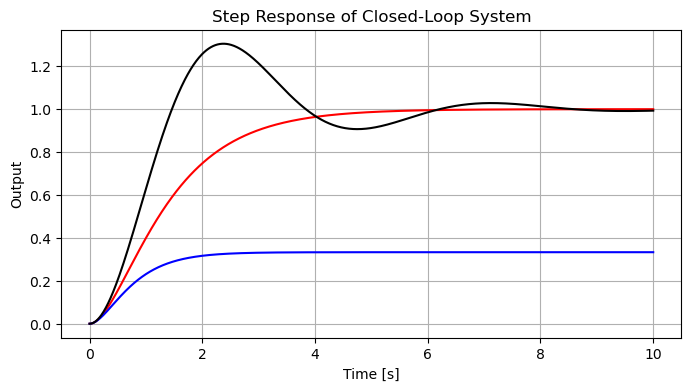

State Feedback Gain K: [[ 1. -0.]]
State Feedback Gain K_2: [[2. 2.]]


In [22]:
# Time vector
t = np.linspace(0, 10, 1000)

# Initial state is zero, simulate step input
t, y = step_response(cl_sys, T=t)
t, y_2 = step_response(cl_sys_2, T=t)
t, y_ol = step_response(plant, T=t)

# Plot
plt.figure(figsize = (8,4))
plt.plot(t, y, c='r')
plt.plot(t, y_2, c='b')
plt.plot(t, y_ol, c='k')
plt.title('Step Response of Closed-Loop System')
plt.xlabel('Time [s]')
plt.ylabel('Output')
plt.grid(True)
plt.show()
# Show the gain matrix
print("State Feedback Gain K:", K)
print("State Feedback Gain K_2:", K_2)